In [1]:
import numpy as np
from smeshtools.hextools import gen_hex_ring_2d_arr, arr_to_hex_text, hex_text_to_arr
from smeshtools.hex_channel import Hex_channel
import matplotlib.pyplot as plt

# 1. Generate text files to represent channel locations

In [2]:
# Generate a text file that represents a hexagonal arrray with rings
channel_ids = ['F12','F11','F10','F09','F08','F07','R06','R05','R04','R03',
               'R02','R01']
ring_arr_2d = gen_hex_ring_2d_arr(channel_ids,void_id="VOI")
arr_to_hex_text(ring_arr_2d,"x_ring.txt",hex_type="x")

In [3]:
# Verify that the text to arr reader returns the original array
ring_arr_2d_test = hex_text_to_arr("x_ring.txt",hex_type="x")
np.all(ring_arr_2d==ring_arr_2d_test)

True

# 2. Create the channel-wise hex mesh model

In [4]:
# Geometry specifications
P = 4.9
origin = (0,0,0)

# Axial geometry
z  = np.array([0, 5, 13, 21, 29, 37, 45, 53, 61, 69, 77, 85, 93, 101, 109, 117, 125, 135])
dz = np.diff(z)

In [5]:
# Input/Output Id map
layer_ids = np.linspace(1,17,17).astype(int).astype(str)
inp_id_map = np.zeros([0,17],dtype="U7")
for channel_id in channel_ids:
    channel_inp_ids = np.char.add(channel_id+'_',layer_ids)
    inp_id_map = np.vstack([inp_id_map, channel_inp_ids])

In [6]:
# Initialize the hex_channel object
hex_channel = Hex_channel("x_ring.txt", inp_id_map, channel_ids, 
                          out_id_map=None, hex_type="x", channel_void_id="VOI", 
                          void_id="VOI")

# 3. Geometry Representations

In [7]:
# Constrain the geometry
hex_channel.constrain(origin,P,dz)

# Get channel centroids
hex_channel.gen_channel_centroids()

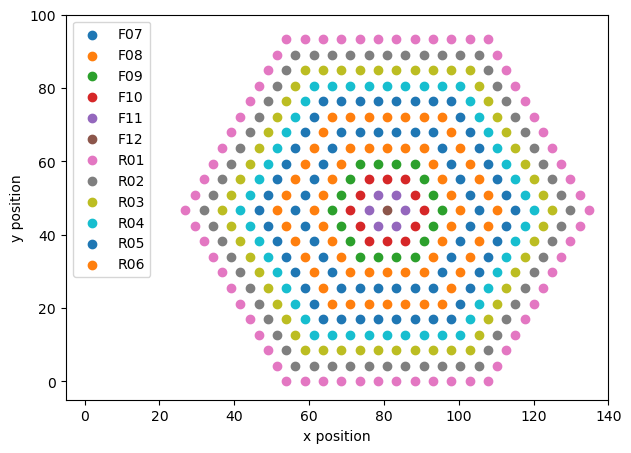

In [14]:
# Plot channel centroids
ch_centroids = hex_channel.channel_centroids
plt.figure(figsize=(7,5))
for centroids in ch_centroids.values():
    plt.scatter(centroids[:,0],centroids[:,1])
plt.xlabel("x position")
plt.ylabel("y position")
plt.xlim([-5,140])
plt.ylim([-5,100])
plt.legend(ch_centroids.keys())
plt.show()

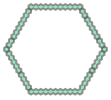

In [9]:
# Generate the geometry collections
hex_channel.gen_channel_GeometryCollection()
hex_channel.channel_GeometryCollection.geoms[-5]

# 4. Interfaces

In [10]:
# Generate interface data
hex_channel.gen_interfaces()